In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from keras.models import Sequential, load_model
from keras.callbacks import History, EarlyStopping, Callback
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
## LISTA DE ANOMALÍAS
#path = '/content/drive/MyDrive/Doctorado/Artículo Anomalías/'
path = ''

df = pd.read_csv(path+'labeled_anomalies.csv')
df.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,A-1,SMAP,"[[4690, 4774]]",[point],8640
1,A-2,SMAP,"[[4450, 4560]]",[contextual],7914
2,A-3,SMAP,"[[4575, 4760]]",[contextual],8205
3,A-4,SMAP,"[[4550, 4660]]",[contextual],8080
4,A-5,SMAP,"[[2750, 2800]]",[point],4693


In [3]:
print("Number of SMAP channels: ",df[df['spacecraft']== 'SMAP'].count().chan_id)
print("Number of MSL channels: ",df[df['spacecraft']== 'MSL'].count().chan_id)

Number of SMAP channels:  55
Number of MSL channels:  27


In [21]:
l_w = 200 # Window length
n_p = 1 # Number of predictions

In [22]:
def shape_data(arr,train=True):
    data = []
    for i in range(len(arr) - l_w - n_p):
        data.append(arr[i:i + l_w + n_p])
    data = np.array(data)

    assert len(data.shape) == 3
    if train:
        X_train = data[:, :-n_p, :]
        y_train = data[:, -n_p:, 0]  # telemetry value is at position 0
        
        return X_train,y_train
    else:
        X_test = data[:, :-n_p, :]
        y_test = data[:, -n_p:, 0]  # telemetry value is at position 0
        return X_test,y_test

In [23]:
len(df)

82

##################################################
Mission:  SMAP
Channel:  A-1
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 8s 4ms/step - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 9.7737e-05 - val_mse: 9.7737e-05
Epoch 3/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 1.3874e-04 - val_mse: 1.3874e-04
Epoch 4/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.9011e-04 - val_mse: 7.9011e-04
Epoch 5/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.9627e-04 - val_mse: 8.9627e-04
Epoch 6/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0085 - mse: 0.0085

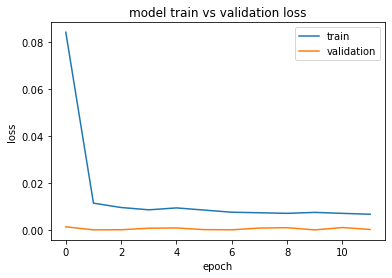

##################################################
Mission:  SMAP
Channel:  A-2
Training shape:  (2447, 200, 25)
Label shape (Telemetry value):  (2447, 1)
Train on 1639 samples, validate on 808 samples
Epoch 1/35
1639/1639 [==============================] - 7s 4ms/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 2/35
1639/1639 [==============================] - 6s 4ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 3/35
1639/1639 [==============================] - 6s 4ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 4/35
1639/1639 [==============================] - 6s 4ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 5/35
1639/1639 [==============================] - 6s 4ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 6/35
1639/1639 [==============================] - 6s 4ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0361 - val_mse: 0

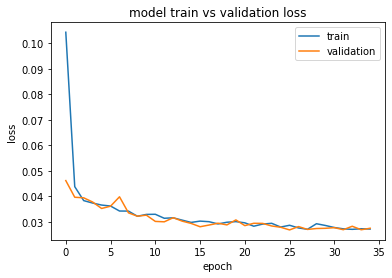

##################################################
Mission:  SMAP
Channel:  A-3
Training shape:  (2535, 200, 25)
Label shape (Telemetry value):  (2535, 1)
Train on 1698 samples, validate on 837 samples
Epoch 1/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 2/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 3/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 4/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 5/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 6/35
1698/1698 [==============================] - 7s 4ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0184 - val_mse: 0

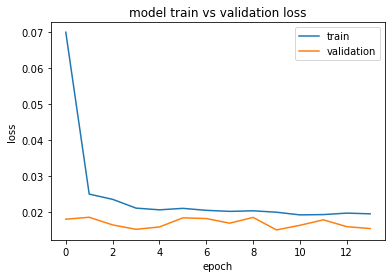

##################################################
Mission:  SMAP
Channel:  A-4
Training shape:  (2489, 200, 25)
Label shape (Telemetry value):  (2489, 1)
Train on 1667 samples, validate on 822 samples
Epoch 1/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 3/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 4/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 5/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 6/35
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0189 - val_mse: 0

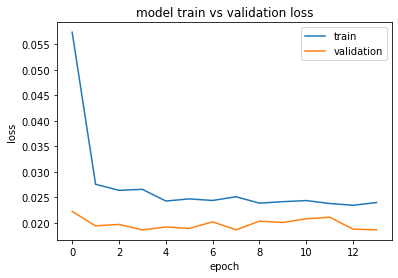

##################################################
Mission:  SMAP
Channel:  A-5
Training shape:  (504, 200, 25)
Label shape (Telemetry value):  (504, 1)
Train on 337 samples, validate on 167 samples
Epoch 1/35
337/337 [==============================] - 2s 6ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 2/35
337/337 [==============================] - 1s 4ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3/35
337/337 [==============================] - 1s 4ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 4/35
337/337 [==============================] - 1s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/35
337/337 [==============================] - 1s 4ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/35
337/337 [==============================] - 1s 4ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/3

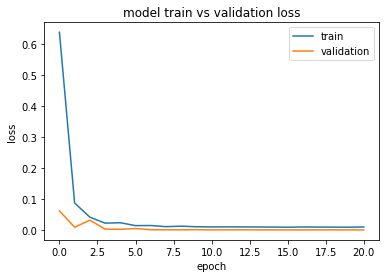

##################################################
Mission:  SMAP
Channel:  A-6
Training shape:  (481, 200, 25)
Label shape (Telemetry value):  (481, 1)
Train on 322 samples, validate on 159 samples
Epoch 1/35
322/322 [==============================] - 3s 8ms/step - loss: 0.2451 - mse: 0.2451 - val_loss: 0.2017 - val_mse: 0.2017
Epoch 2/35
322/322 [==============================] - 1s 5ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 3/35
322/322 [==============================] - 1s 5ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 4/35
322/322 [==============================] - 2s 5ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0768 - val_mse: 0.0768
Epoch 5/35
322/322 [==============================] - 2s 5ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 6/35
322/322 [==============================] - 2s 5ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 7/3

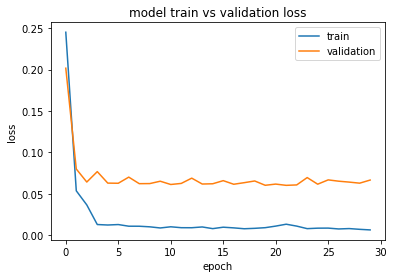

##################################################
Mission:  SMAP
Channel:  A-7
Training shape:  (2678, 200, 25)
Label shape (Telemetry value):  (2678, 1)
Train on 1794 samples, validate on 884 samples
Epoch 1/35
1794/1794 [==============================] - 8s 4ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 2/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 3/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 4/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 5/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 6/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0186 - val_mse: 0

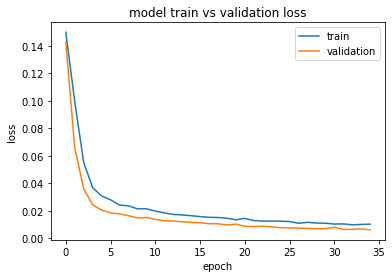

##################################################
Mission:  SMAP
Channel:  A-8
Training shape:  (561, 200, 25)
Label shape (Telemetry value):  (561, 1)
Train on 375 samples, validate on 186 samples
Epoch 1/35
375/375 [==============================] - 2s 6ms/step - loss: 0.6053 - mse: 0.6053 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/35
375/375 [==============================] - 1s 4ms/step - loss: 0.1359 - mse: 0.1359 - val_loss: 6.6617e-04 - val_mse: 6.6617e-04
Epoch 3/35
375/375 [==============================] - 2s 4ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 4/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 4.8677e-04 - val_mse: 4.8677e-04
Epoch 5/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 3.4620e-05 - val_m

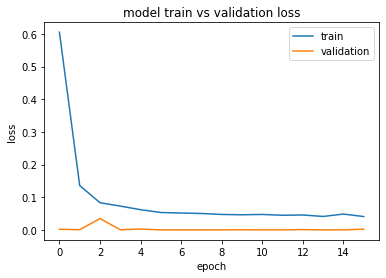

##################################################
Mission:  SMAP
Channel:  A-9
Training shape:  (561, 200, 25)
Label shape (Telemetry value):  (561, 1)
Train on 375 samples, validate on 186 samples
Epoch 1/35
375/375 [==============================] - 2s 5ms/step - loss: 0.4880 - mse: 0.4880 - val_loss: 0.1527 - val_mse: 0.1527
Epoch 2/35
375/375 [==============================] - 1s 4ms/step - loss: 0.1357 - mse: 0.1357 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0935 - mse: 0.0935 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 4/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 9.7954e-04 - val_mse: 9.7954e-04
Epoch 5/35
375/375 [==============================] - 1s 4ms/step - loss: 0.0622 - mse: 0.0622 - val_loss: 5.3765e-04 - val_mse: 5.3765e-04
Epoch 6/35
375/375 [==============================] - 2s 4ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 3.0547e-04 - val_m

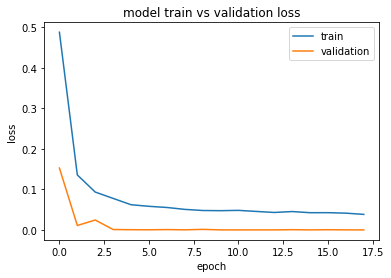

##################################################
Mission:  SMAP
Channel:  B-1
Training shape:  (2234, 200, 25)
Label shape (Telemetry value):  (2234, 1)
Train on 1496 samples, validate on 738 samples
Epoch 1/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.1932 - mse: 0.1932 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 8.2705e-04 - val_mse: 8.2705e-04
Epoch 3/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 9.7491e-05 - val_mse: 9.7491e-05
Epoch 4/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 1.8953e-07 - val_mse: 1.8953e-07
Epoch 5/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.4758e-05 - val_mse: 8.4758e-05
Epoch 6/35
1496/1496 [==============================] - 6s 4ms/step - loss: 0.0086 - mse: 0.0086

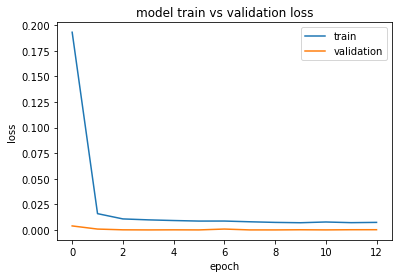

##################################################
Mission:  SMAP
Channel:  D-1
Training shape:  (2648, 200, 25)
Label shape (Telemetry value):  (2648, 1)
Train on 1774 samples, validate on 874 samples
Epoch 1/35
1774/1774 [==============================] - 8s 4ms/step - loss: 0.0660 - mse: 0.0660 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/35
1774/1774 [==============================] - 7s 4ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/35
1774/1774 [==============================] - 7s 4ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/35
1774/1774 [==============================] - 7s 4ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/35
1774/1774 [==============================] - 7s 4ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/35
1774/1774 [==============================] - 7s 4ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0022 - val_mse: 0

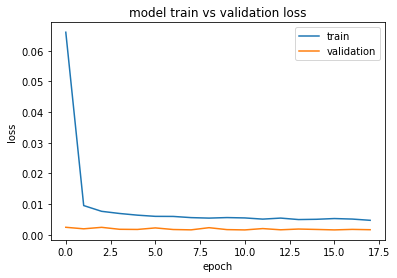

##################################################
Mission:  SMAP
Channel:  D-11
Training shape:  (2410, 200, 25)
Label shape (Telemetry value):  (2410, 1)
Train on 1614 samples, validate on 796 samples
Epoch 1/35
1614/1614 [==============================] - 7s 4ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 2/35
1614/1614 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3/35
1614/1614 [==============================] - 6s 4ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/35
1614/1614 [==============================] - 6s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/35
1614/1614 [==============================] - 6s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 6/35
1614/1614 [==============================] - 7s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0034 - val_mse: 

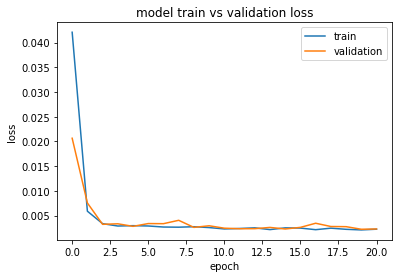

##################################################
Mission:  SMAP
Channel:  D-12
Training shape:  (111, 200, 25)
Label shape (Telemetry value):  (111, 1)
Train on 74 samples, validate on 37 samples
Epoch 1/35
74/74 [==============================] - 1s 15ms/step - loss: 1.1794 - mse: 1.1794 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 2/35
74/74 [==============================] - 0s 6ms/step - loss: 0.6295 - mse: 0.6295 - val_loss: 0.2772 - val_mse: 0.2772
Epoch 3/35
74/74 [==============================] - 0s 6ms/step - loss: 0.2706 - mse: 0.2706 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 4/35
74/74 [==============================] - 1s 7ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 5/35
74/74 [==============================] - 1s 7ms/step - loss: 0.1437 - mse: 0.1437 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 6/35
74/74 [==============================] - 1s 7ms/step - loss: 0.1079 - mse: 0.1079 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/35
74/74 [===

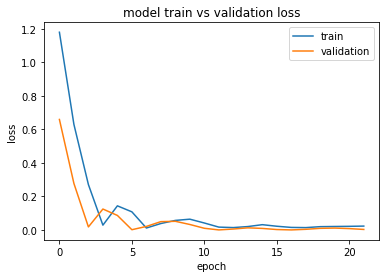

##################################################
Mission:  SMAP
Channel:  D-13
Training shape:  (1289, 200, 25)
Label shape (Telemetry value):  (1289, 1)
Train on 863 samples, validate on 426 samples
Epoch 1/35
863/863 [==============================] - 4s 5ms/step - loss: 0.2644 - mse: 0.2644 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 2/35
863/863 [==============================] - 3s 4ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/35
863/863 [==============================] - 3s 4ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 6.8062e-04 - val_mse: 6.8062e-04
Epoch 4/35
863/863 [==============================] - 3s 4ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/35
863/863 [==============================] - 3s 4ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 7.9643e-04 - val_mse: 7.9643e-04
Epoch 6/35
863/863 [==============================] - 3s 4ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.6145e-06 - va

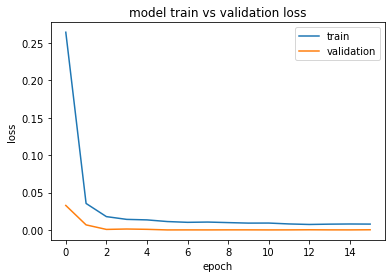

##################################################
Mission:  SMAP
Channel:  D-2
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 8s 4ms/step - loss: 0.1252 - mse: 0.1252 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 4.0556e-04 - val_mse: 4.0556e-04
Epoch 3/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 7.0475e-05 - val_mse: 7.0475e-05
Epoch 4/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.8187e-05 - val_mse: 6.8187e-05
Epoch 5/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 5.1342e-05 - val_mse: 5.1342e-05
Epoch 6/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0078 - mse: 0.0078

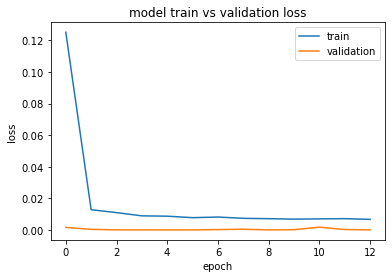

##################################################
Mission:  SMAP
Channel:  D-3
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 8s 4ms/step - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 5.8538e-04 - val_mse: 5.8538e-04
Epoch 3/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 6.1753e-04 - val_mse: 6.1753e-04
Epoch 4/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 2.4604e-04 - val_mse: 2.4604e-04
Epoch 5/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.9913e-04 - val_mse: 4.9913e-04
Epoch 6/35
1794/1794 [==============================] - 7s 4ms/step - loss: 0.0077 - mse: 0.0077

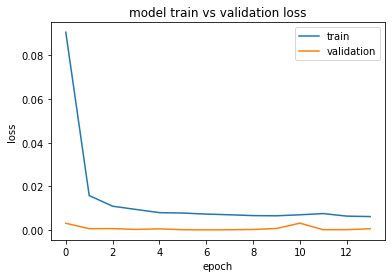

##################################################
Mission:  SMAP
Channel:  D-4
Training shape:  (2632, 200, 25)
Label shape (Telemetry value):  (2632, 1)
Train on 1763 samples, validate on 869 samples
Epoch 1/35
1763/1763 [==============================] - 8s 5ms/step - loss: 0.1154 - mse: 0.1154 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2/35
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/35
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 1.6642e-04 - val_mse: 1.6642e-04
Epoch 4/35
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 2.7553e-04 - val_mse: 2.7553e-04
Epoch 5/35
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.4507e-05 - val_mse: 6.4507e-05
Epoch 6/35
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0078 - mse: 0.0078 - val_l

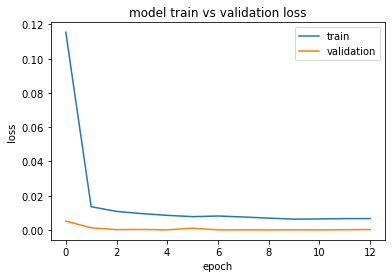

##################################################
Mission:  SMAP
Channel:  D-5
Training shape:  (2360, 200, 25)
Label shape (Telemetry value):  (2360, 1)
Train on 1581 samples, validate on 779 samples
Epoch 1/35
1581/1581 [==============================] - 7s 4ms/step - loss: 0.1108 - mse: 0.1108 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2/35
1581/1581 [==============================] - 6s 4ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 8.8938e-04 - val_mse: 8.8938e-04
Epoch 3/35
1581/1581 [==============================] - 6s 4ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 1.0829e-04 - val_mse: 1.0829e-04
Epoch 4/35
1581/1581 [==============================] - 6s 4ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 2.4990e-04 - val_mse: 2.4990e-04
Epoch 5/35
1581/1581 [==============================] - 6s 4ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 9.5709e-05 - val_mse: 9.5709e-05
Epoch 6/35
1581/1581 [==============================] - 6s 4ms/step - loss: 0.0081 - mse: 0.0081

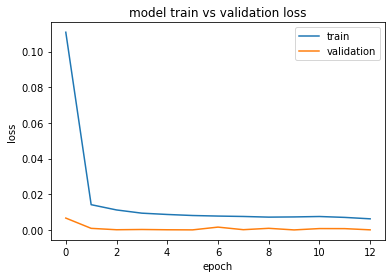

##################################################
Mission:  SMAP
Channel:  D-6
Training shape:  (2393, 200, 25)
Label shape (Telemetry value):  (2393, 1)
Train on 1603 samples, validate on 790 samples
Epoch 1/35
1603/1603 [==============================] - 11s 7ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 2/35
1603/1603 [==============================] - 11s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 3/35
1603/1603 [==============================] - 10s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 4/35
1603/1603 [==============================] - 10s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 5/35
1603/1603 [==============================] - 9s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 6/35
1603/1603 [==============================] - 12s 7ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0057 - val_m

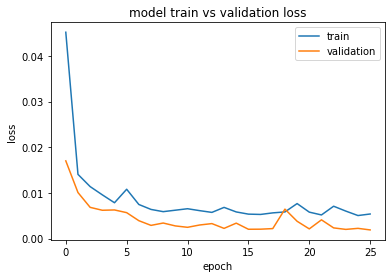

##################################################
Mission:  SMAP
Channel:  D-7
Training shape:  (2382, 200, 25)
Label shape (Telemetry value):  (2382, 1)
Train on 1595 samples, validate on 787 samples
Epoch 1/35
1595/1595 [==============================] - 11s 7ms/step - loss: 0.1557 - mse: 0.1557 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2/35
1595/1595 [==============================] - 9s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 3.1579e-04 - val_mse: 3.1579e-04
Epoch 3/35
1595/1595 [==============================] - 13s 8ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4/35
1595/1595 [==============================] - 12s 7ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 2.8282e-04 - val_mse: 2.8282e-04
Epoch 5/35
1595/1595 [==============================] - 14s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.9045e-04 - val_mse: 4.9045e-04
Epoch 6/35
1595/1595 [==============================] - 10s 6ms/step - loss: 0.0087 - mse: 0.0087 - 

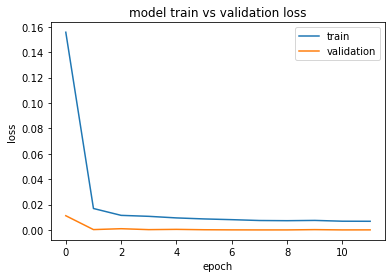

##################################################
Mission:  SMAP
Channel:  D-8
Training shape:  (2401, 200, 25)
Label shape (Telemetry value):  (2401, 1)
Train on 1608 samples, validate on 793 samples
Epoch 1/35
1608/1608 [==============================] - 12s 8ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2/35
1608/1608 [==============================] - 12s 8ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 1.9718e-04 - val_mse: 1.9718e-04
Epoch 3/35
1608/1608 [==============================] - 10s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.6881e-07 - val_mse: 8.6881e-07
Epoch 4/35
1608/1608 [==============================] - 13s 8ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 1.6053e-05 - val_mse: 1.6053e-05
Epoch 5/35
1608/1608 [==============================] - 10s 7ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 1.2625e-04 - val_mse: 1.2625e-04
Epoch 6/35
1608/1608 [==============================] - 11s 7ms/step - loss: 0.0078 - mse: 

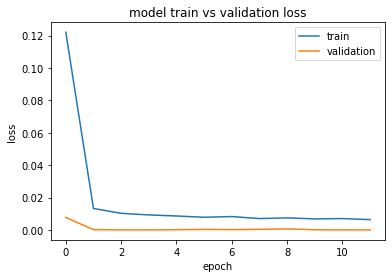

##################################################
Mission:  SMAP
Channel:  D-9
Training shape:  (2382, 200, 25)
Label shape (Telemetry value):  (2382, 1)
Train on 1595 samples, validate on 787 samples
Epoch 1/35
1595/1595 [==============================] - 11s 7ms/step - loss: 0.2131 - mse: 0.2131 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2/35
1595/1595 [==============================] - 11s 7ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/35
1595/1595 [==============================] - 9s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 2.4233e-05 - val_mse: 2.4233e-05
Epoch 4/35
1595/1595 [==============================] - 10s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 4.4893e-05 - val_mse: 4.4893e-05
Epoch 5/35
1595/1595 [==============================] - 10s 7ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 2.1330e-04 - val_mse: 2.1330e-04
Epoch 6/35
1595/1595 [==============================] - 10s 7ms/step - loss: 0.0086 - mse: 0.0086 - 

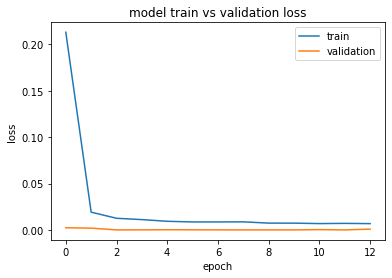

##################################################
Mission:  SMAP
Channel:  E-1
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 2/35
1794/1794 [==============================] - 12s 7ms/step - loss: 0.1898 - mse: 0.1898 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 3/35
1794/1794 [==============================] - 12s 7ms/step - loss: 0.1327 - mse: 0.1327 - val_loss: 0.0971 - val_mse: 0.0971
Epoch 4/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 5/35
1794/1794 [==============================] - 12s 7ms/step - loss: 0.0874 - mse: 0.0874 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 6/35
1794/1794 [==============================] - 10s 6ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0461 - val_

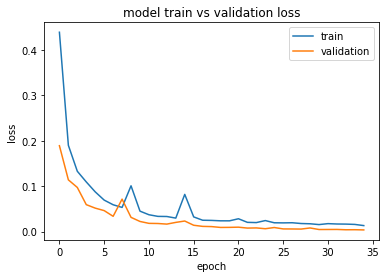

##################################################
Mission:  SMAP
Channel:  E-10
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.4452 - mse: 0.4452 - val_loss: 0.2000 - val_mse: 0.2000
Epoch 2/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.1936 - mse: 0.1936 - val_loss: 0.1176 - val_mse: 0.1176
Epoch 3/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.1489 - mse: 0.1489 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 4/35
1794/1794 [==============================] - 11s 6ms/step - loss: 0.1170 - mse: 0.1170 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 5/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 6/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0406 - val

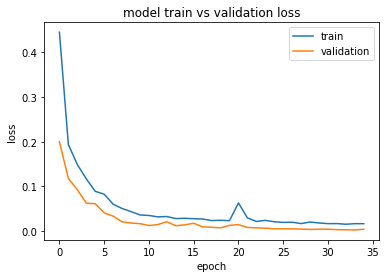

##################################################
Mission:  SMAP
Channel:  E-11
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.4298 - mse: 0.4298 - val_loss: 0.1970 - val_mse: 0.1970
Epoch 2/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.1911 - mse: 0.1911 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 3/35
1794/1794 [==============================] - 13s 8ms/step - loss: 0.1425 - mse: 0.1425 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 4/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/35
1794/1794 [==============================] - 12s 6ms/step - loss: 0.0884 - mse: 0.0884 - val_loss: 0.0877 - val_mse: 0.0877
Epoch 6/35
1794/1794 [==============================] - 12s 7ms/step - loss: 0.0874 - mse: 0.0874 - val_loss: 0.0526 - val

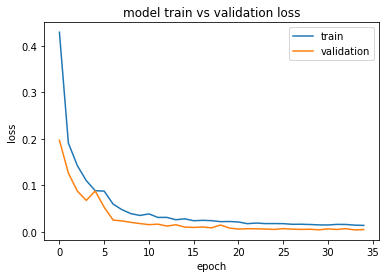

##################################################
Mission:  SMAP
Channel:  E-12
Training shape:  (2679, 200, 25)
Label shape (Telemetry value):  (2679, 1)
Train on 1794 samples, validate on 885 samples
Epoch 1/35
1794/1794 [==============================] - 15s 8ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.1795 - val_mse: 0.1795
Epoch 2/35
1794/1794 [==============================] - 13s 7ms/step - loss: 0.1981 - mse: 0.1981 - val_loss: 0.1215 - val_mse: 0.1215
Epoch 3/35
1794/1794 [==============================] - 14s 8ms/step - loss: 0.1478 - mse: 0.1478 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 4/35
1794/1794 [==============================] - 11s 6ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 5/35
1794/1794 [==============================] - 15s 8ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 6/35
1794/1794 [==============================] - 15s 9ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0346 - val

In [ ]:
for indice in range(0,len(df)):
    #indice = 0
    actual = df.iloc[indice]['chan_id']
    train=np.load(path+'data/train/'+actual+'.npy')
    x_train, y_train = shape_data(train)
    print("##################################################")
    print("Mission: ", df.iloc[indice]['spacecraft'])
    print("Channel: ", actual)
    print("Training shape: ", x_train.shape)
    print("Label shape (Telemetry value): ", y_train.shape)
    cbs = [History(), EarlyStopping(monitor='val_loss', patience= 10, min_delta=0.0003, verbose=0)]
    model = Sequential()
    model.add(LSTM(80, input_shape=(None, x_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(80,return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(n_p))
    model.add(Activation('linear'))

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    history = model.fit(x_train, y_train, batch_size=64, epochs=35,
                        validation_split = 0.33, callbacks=cbs)

    model.save('models/lw_'+str(l_w)+'/'+actual+'.h5')
    
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model train vs validation loss')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.show()